In [1]:
import pandas as pd
from vnstock import  *
from datetime import datetime
import plotly.express as px
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
start = '2020-01-01'
now = datetime.now() - timedelta(days=1)
day = now.strftime("%d/%m/%Y")
now = now.strftime("%Y-%m-%d")
now

'2024-02-18'

In [3]:
df = stock_historical_data('ACB', start, now, "1D", "stock")
df = df[['time', 'close']].rename(columns={"time": "Date", "close": 'ACB'})

In [4]:
stocks_list = ['MWG', 'MSN', 'BID', 'VRE', 'POW', 'PLX', 'HPG', 
               'VNM', 'VHM', 'TCB', 'HDB', 'VIB', 'VCB', 'VJC',
              'VIC', 'FPT', 'CTG', 'TPB', 'BVH', 'GVR', 'SAB', 
              'BCM', 'MBB', 'GAS', 'SSB', 'SHB', 'SSI', 'STB', 'VPB' ]

for stock in stocks_list:
    stock_df = stock_historical_data(stock, start, now, "1D", "stock")
    stock_df = stock_df[['time', 'close']].rename(columns={"time": "Date", "close": stock})
    stock_df.drop_duplicates(subset = ['Date'], inplace= True)
    df = df.merge(stock_df, how = 'left', on = 'Date')

df.to_csv('data/VN30.csv', index = True)

In [49]:
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [50]:
def interactive_plot(df, title):
  
  for i in df.columns[1:]:
    plt.figure(figsize=(16, 6))
    sns.lineplot(df, x = 'Date', y = df[i])
    plt.show()

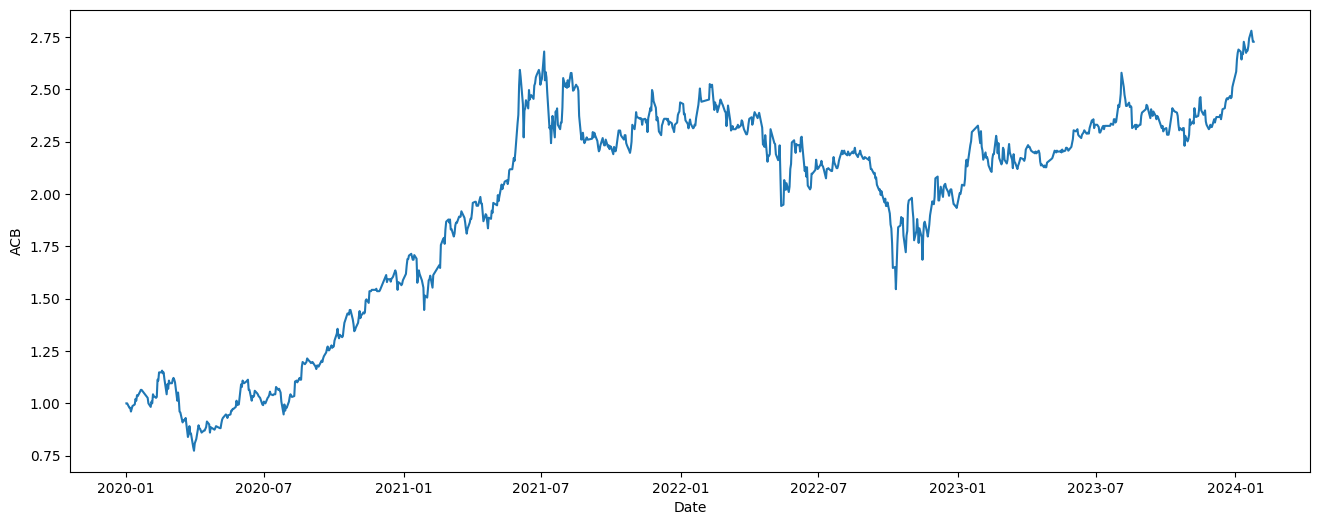

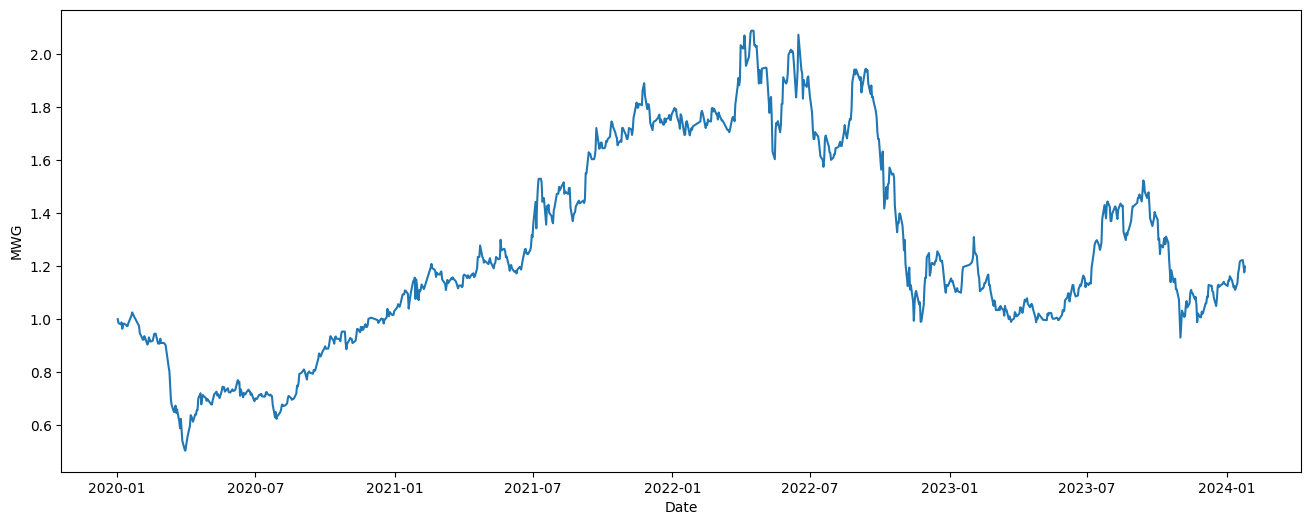

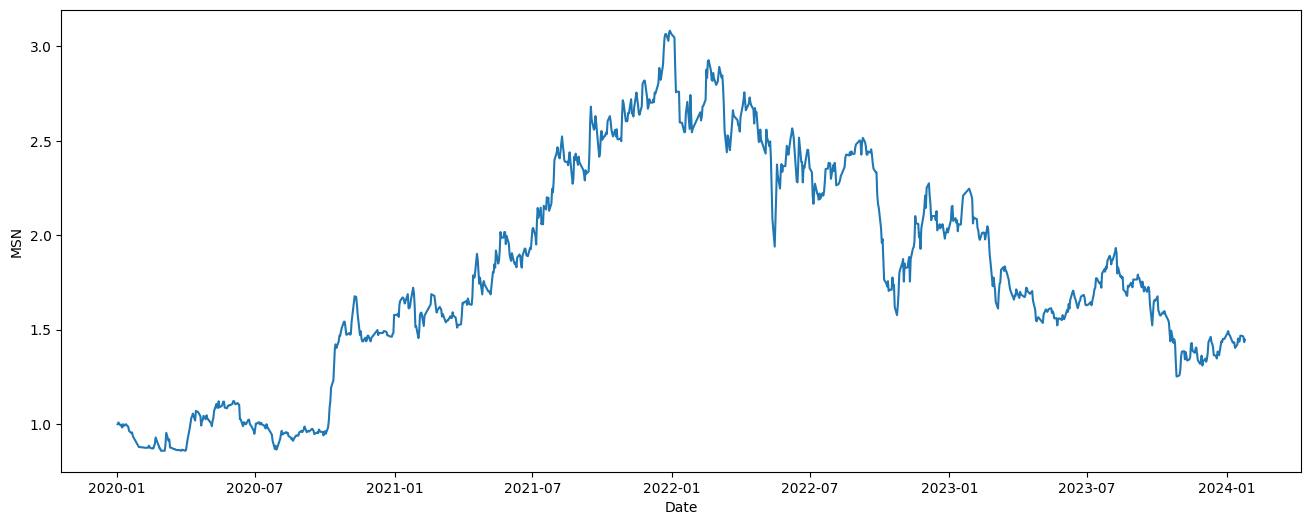

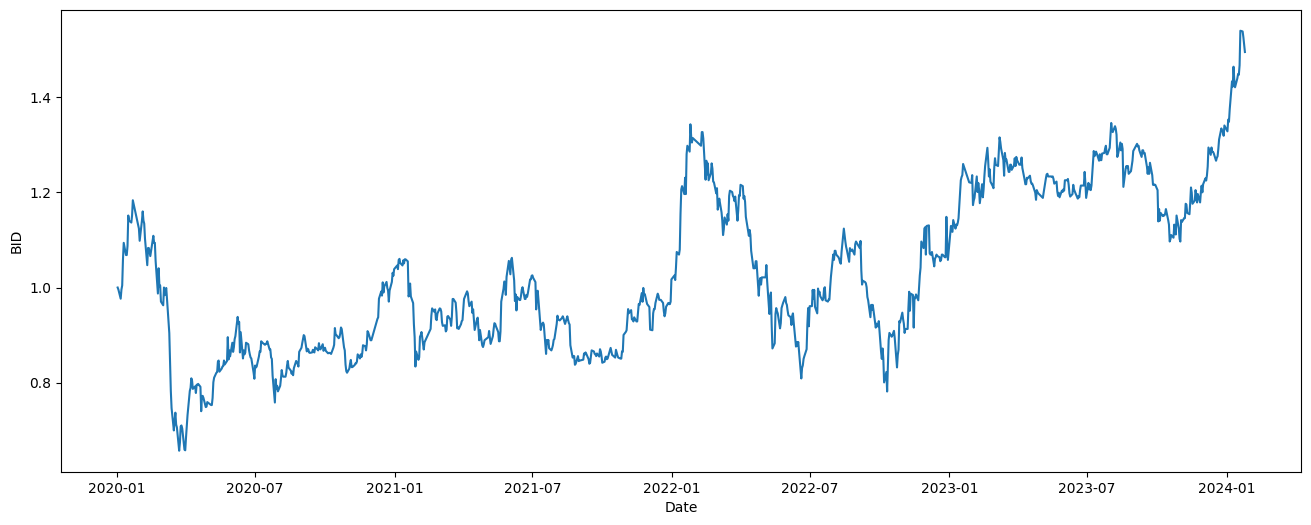

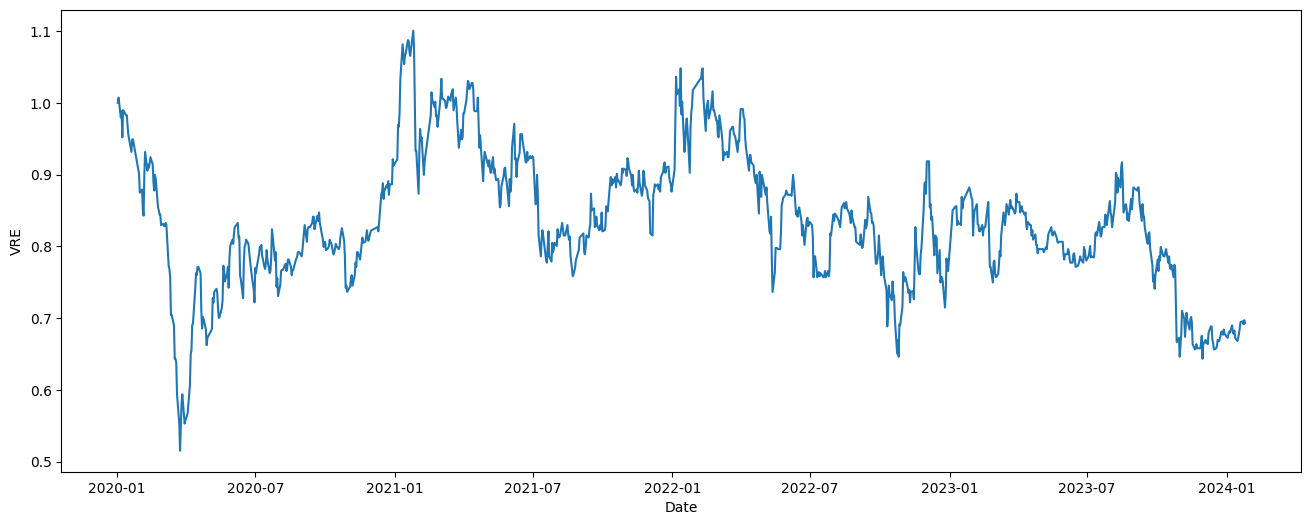

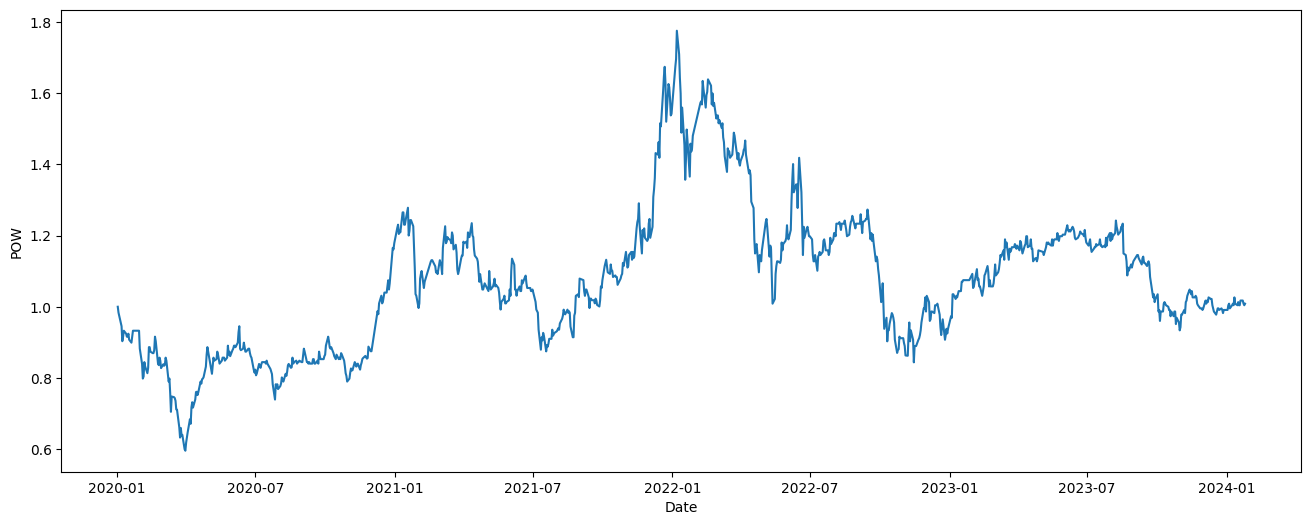

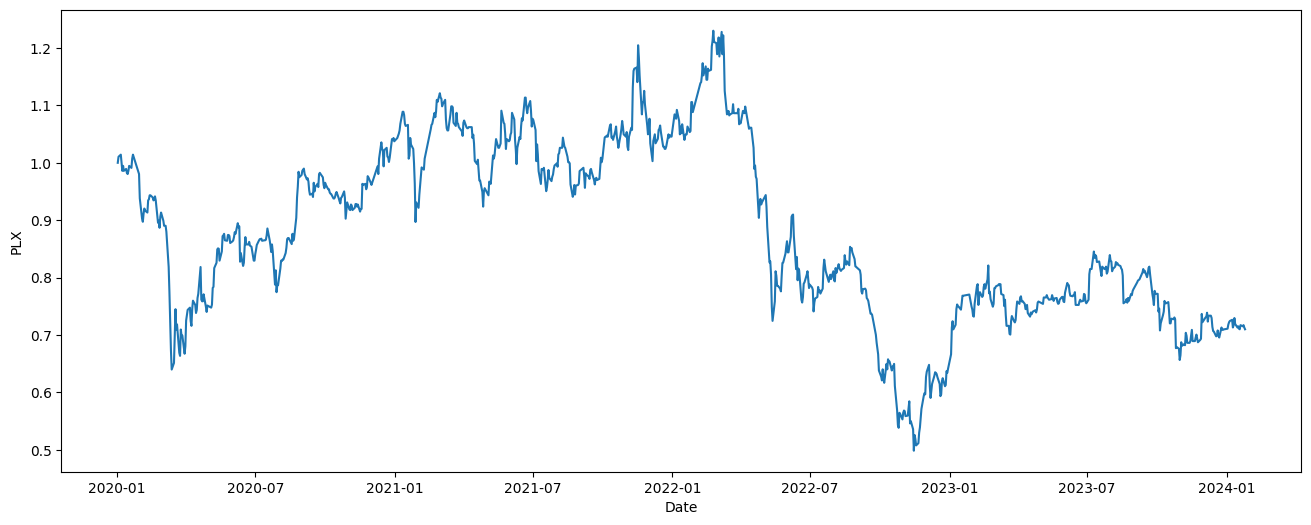

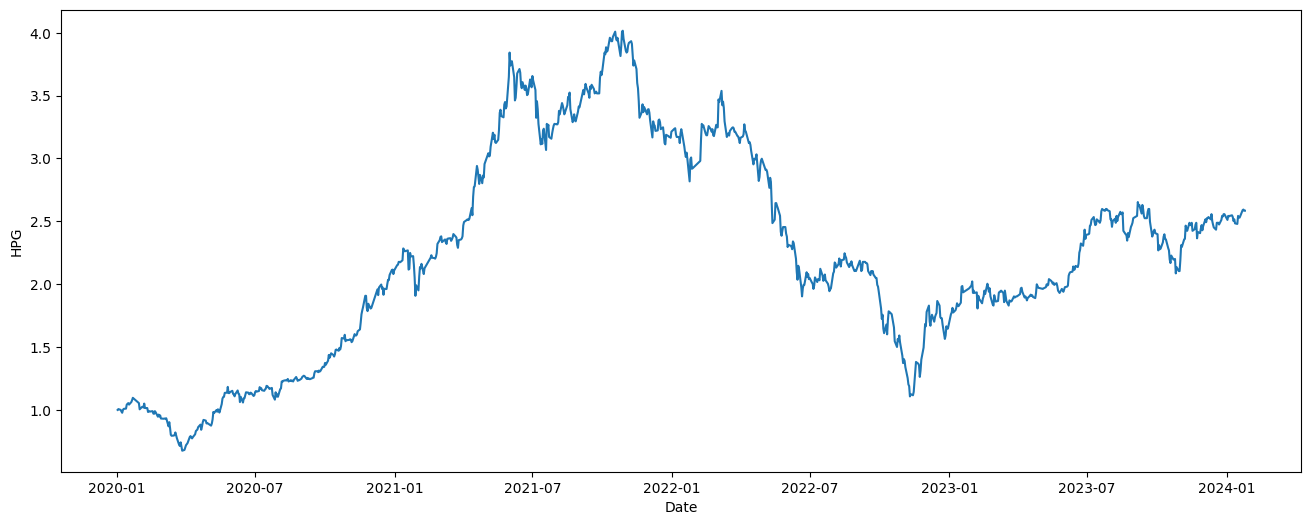

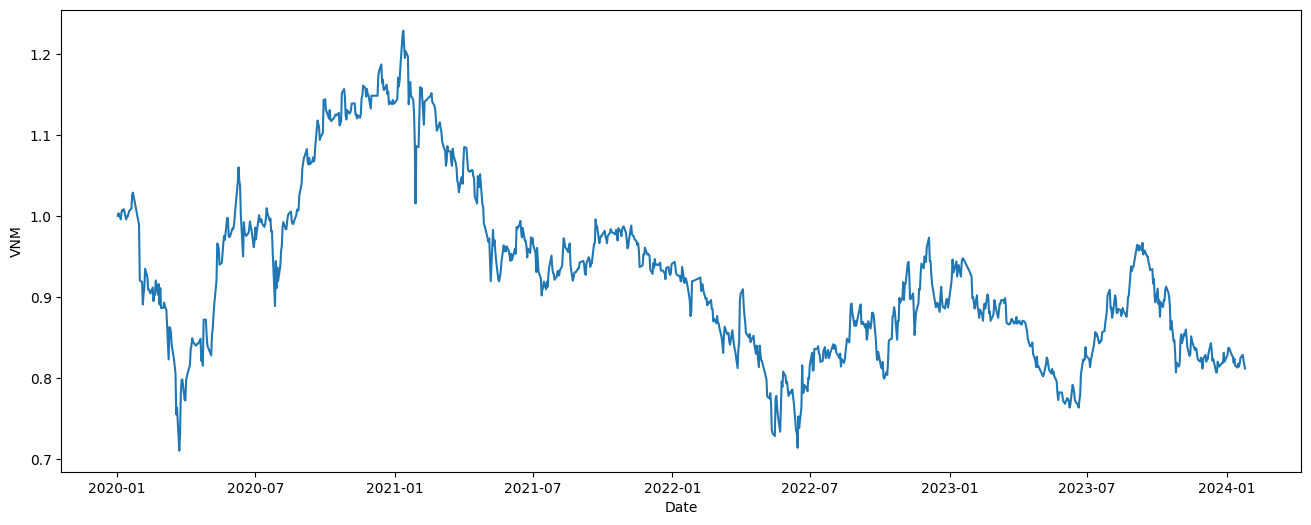

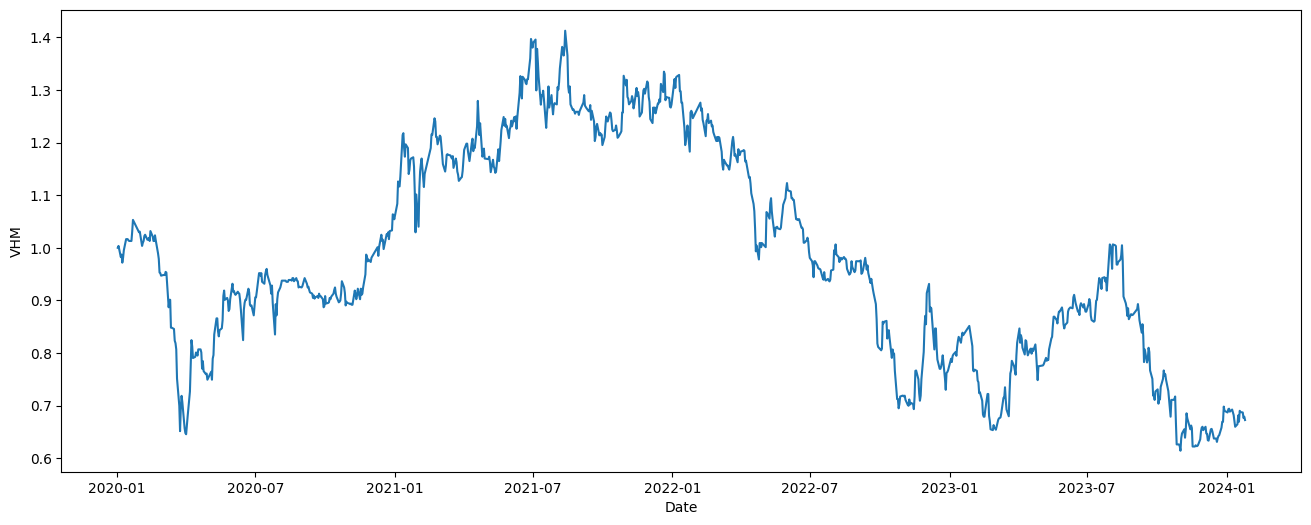

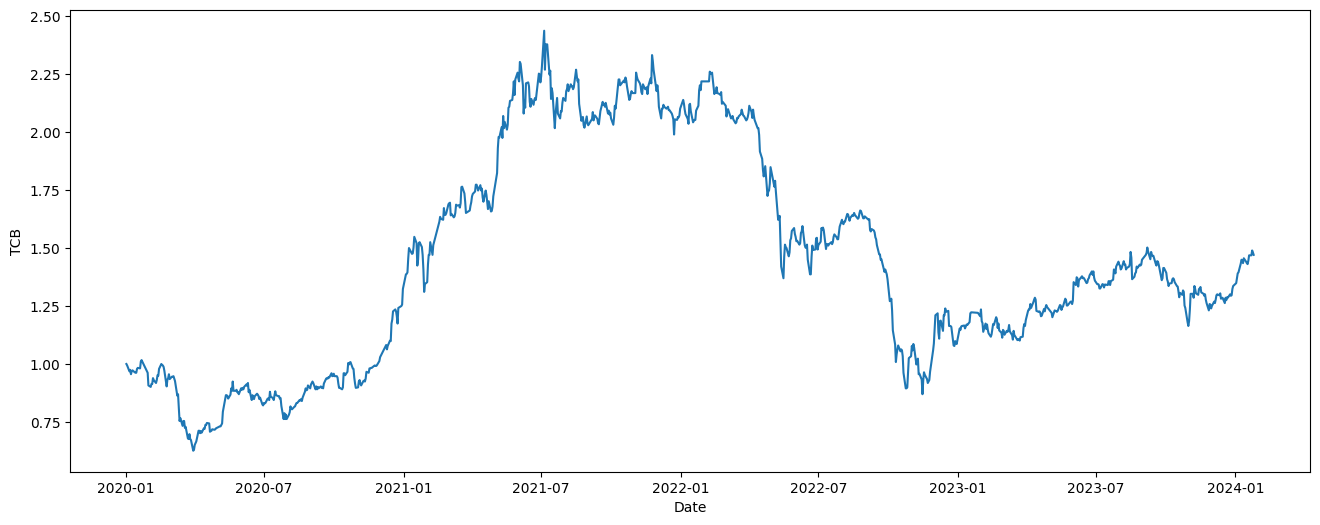

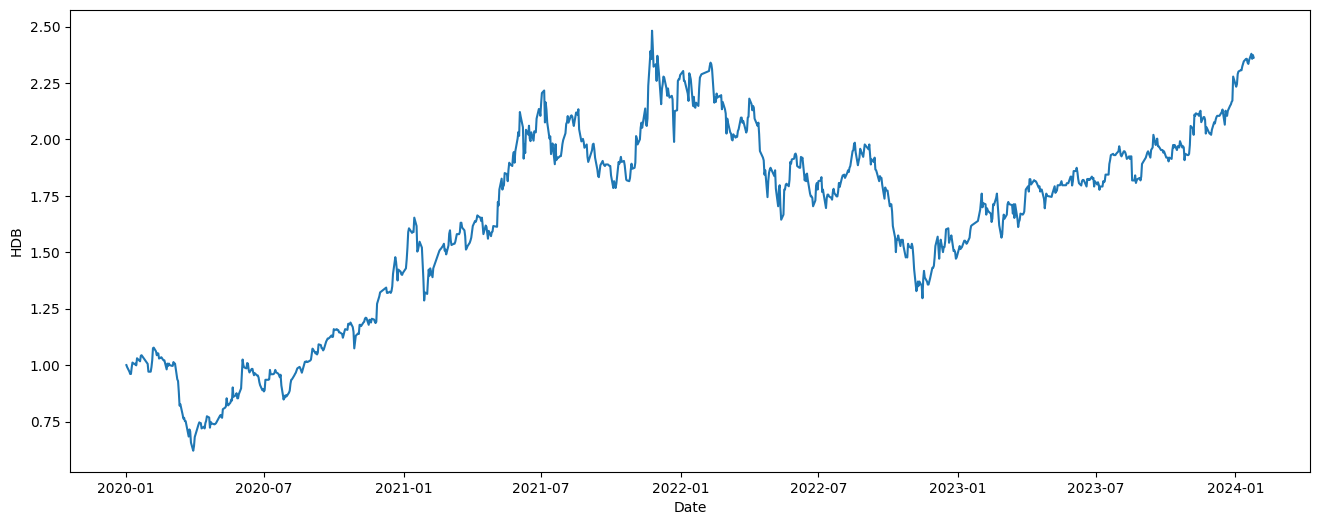

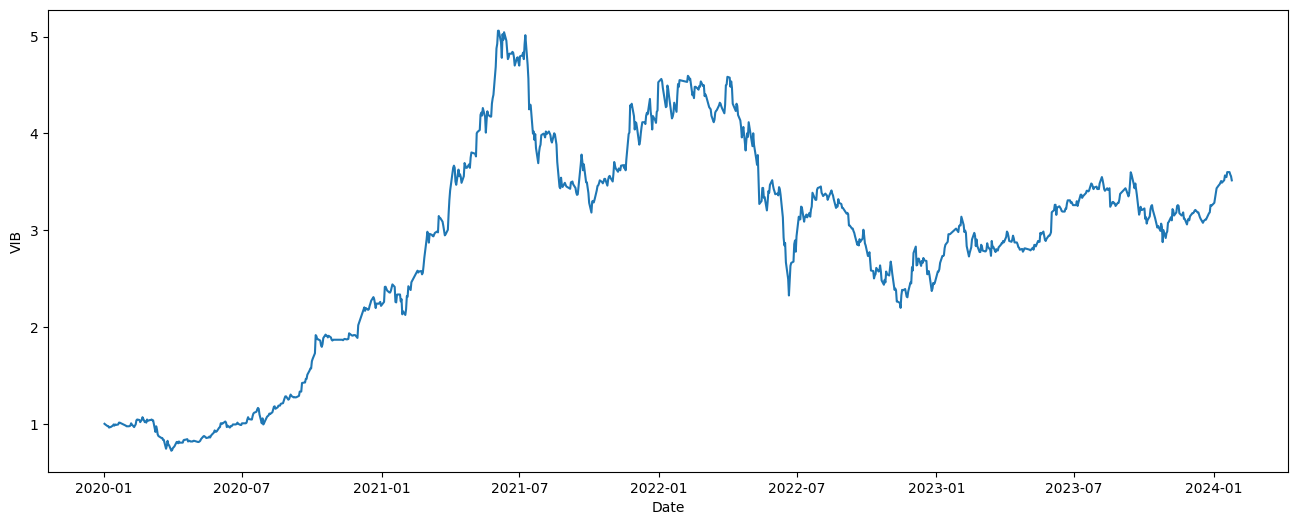

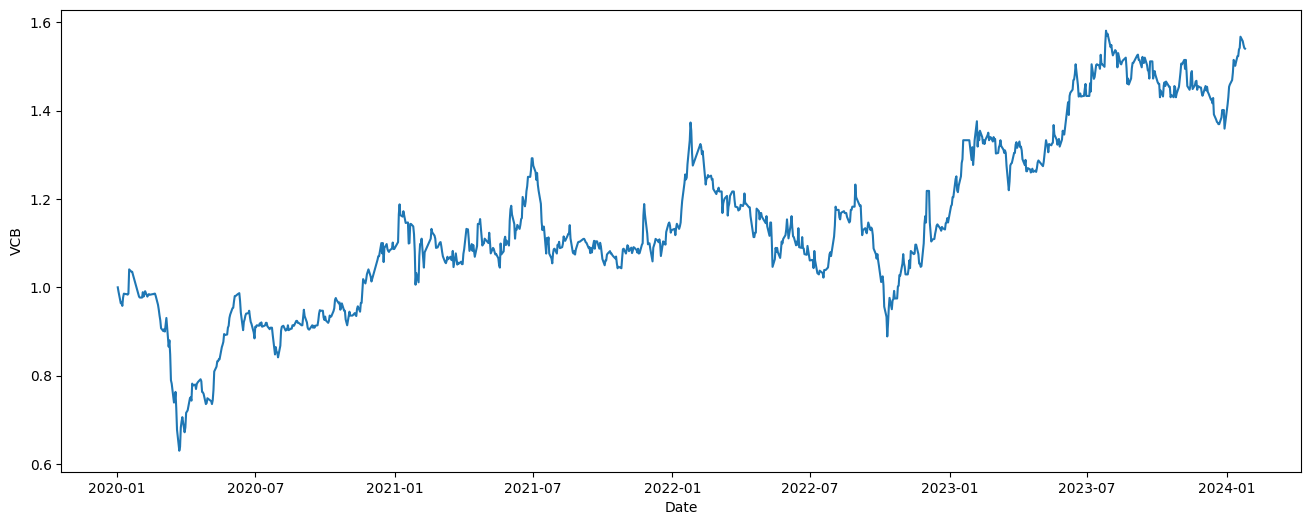

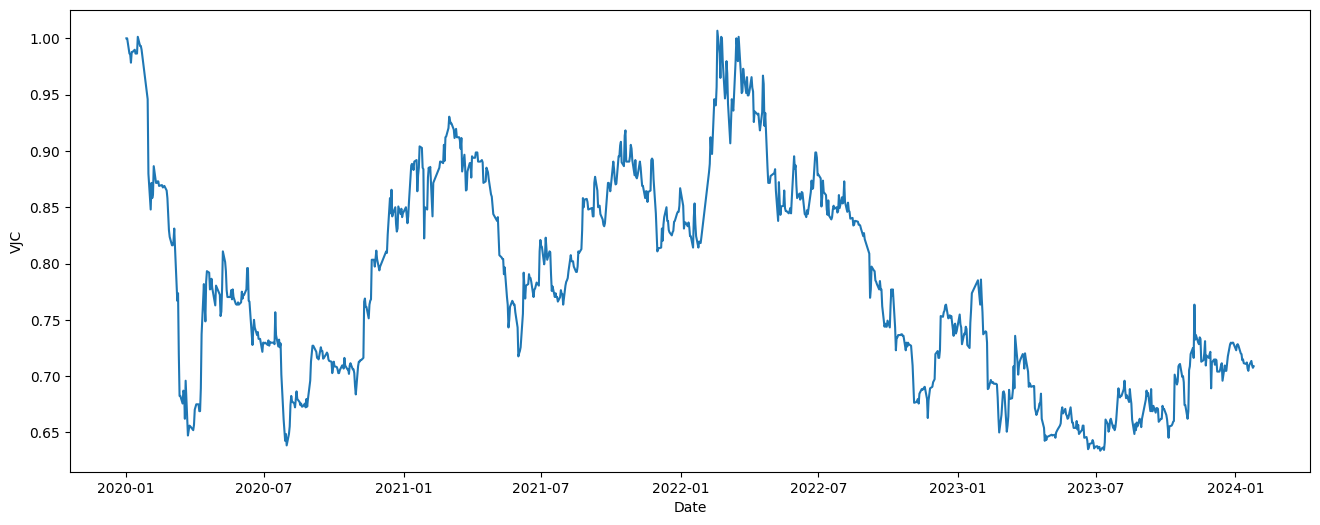

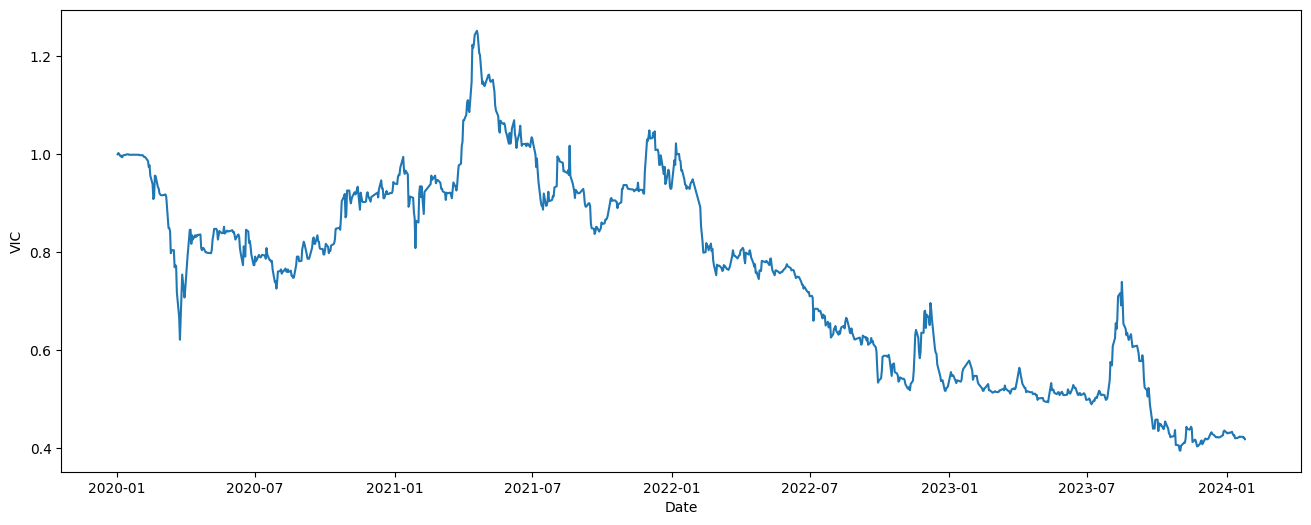

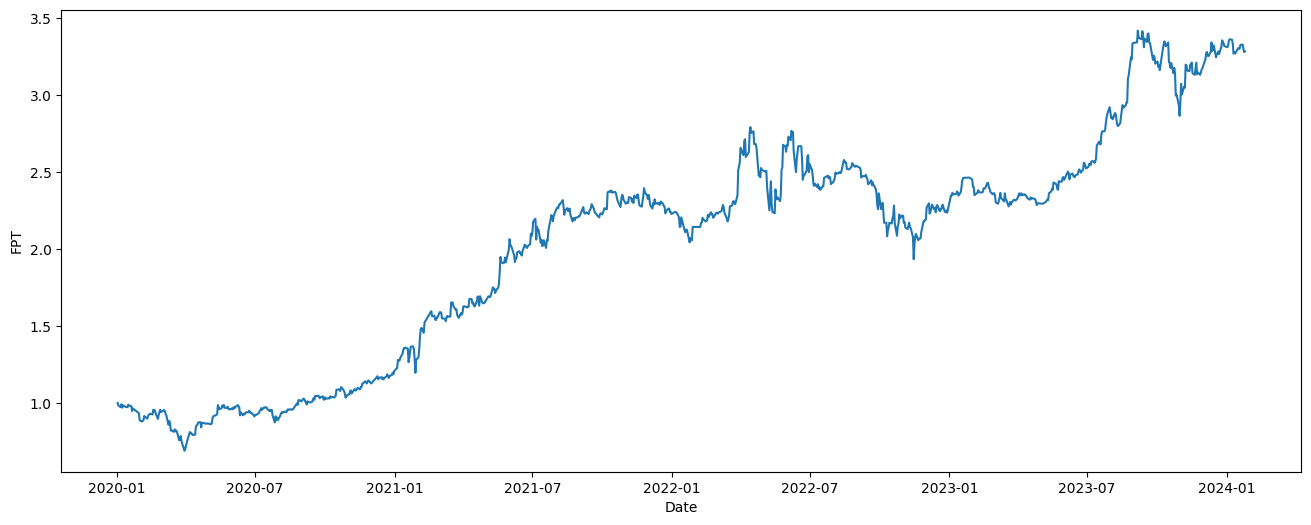

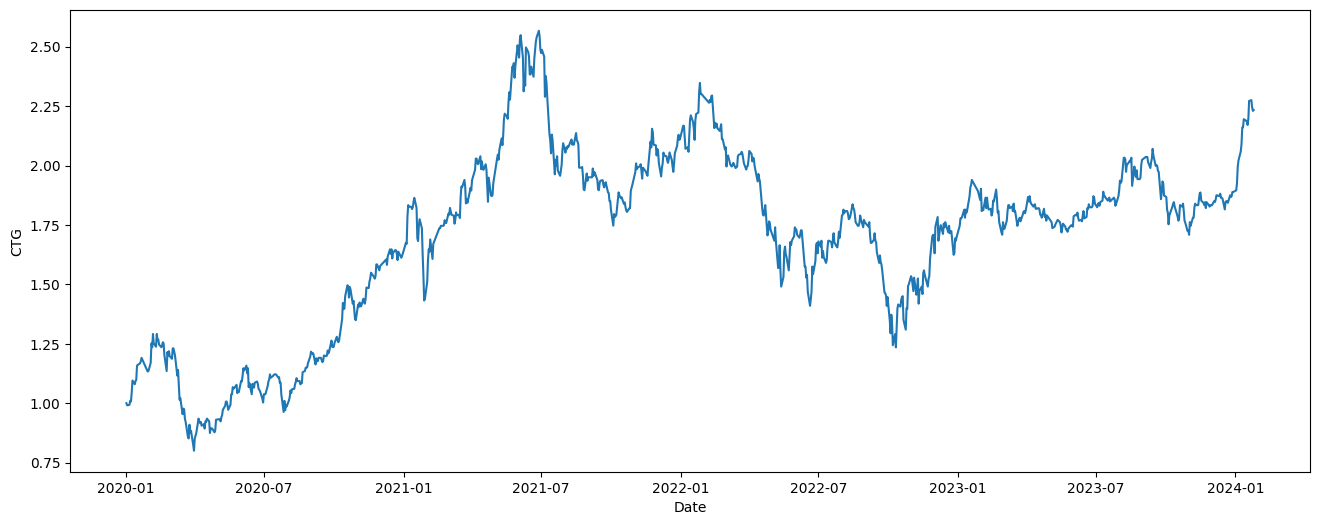

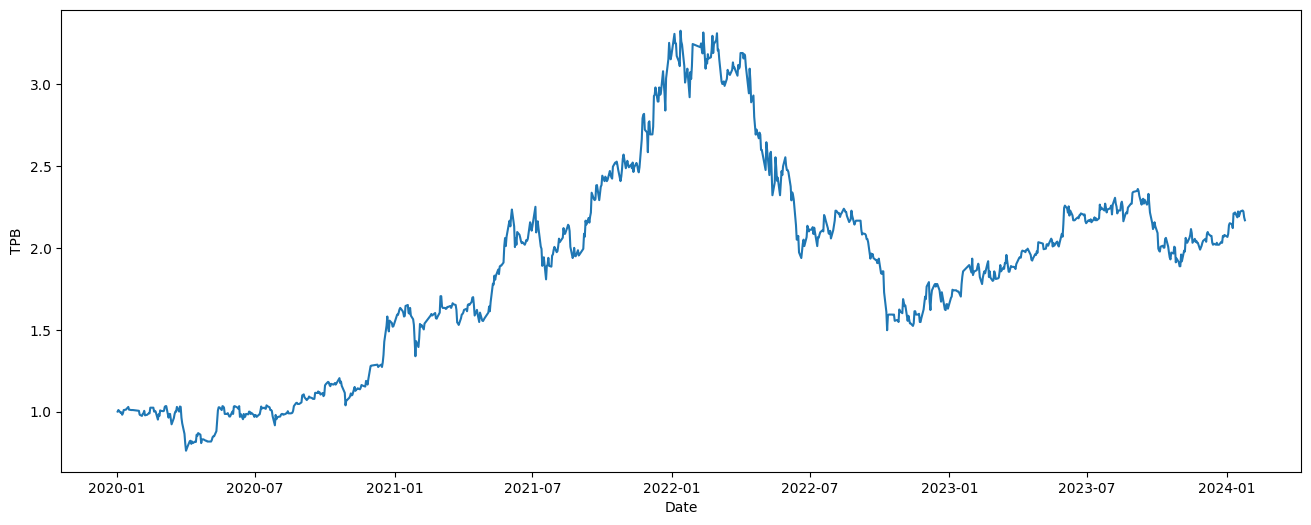

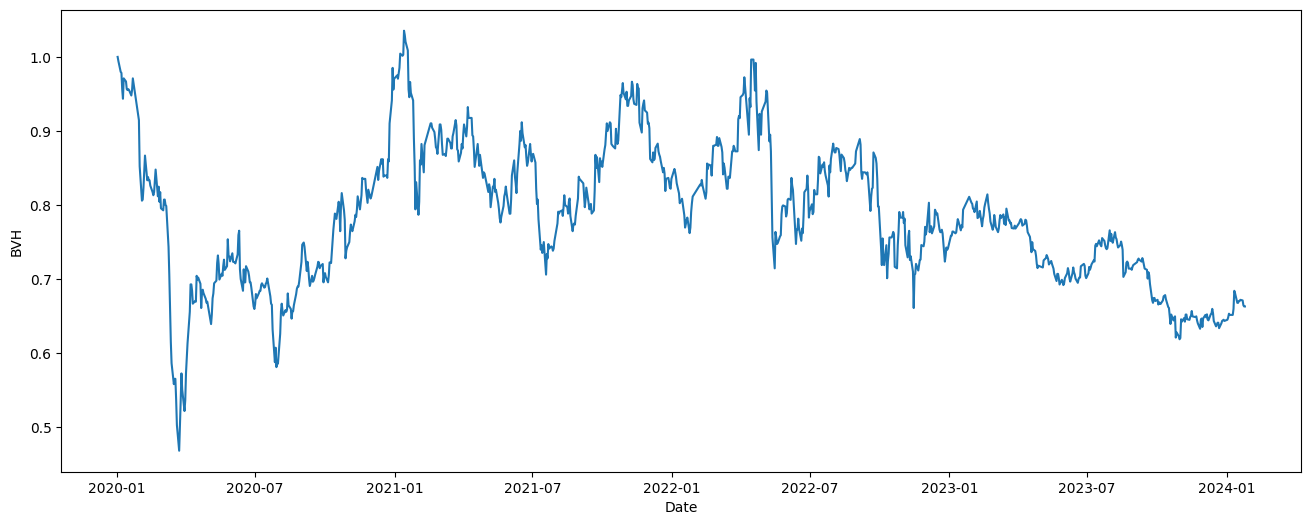

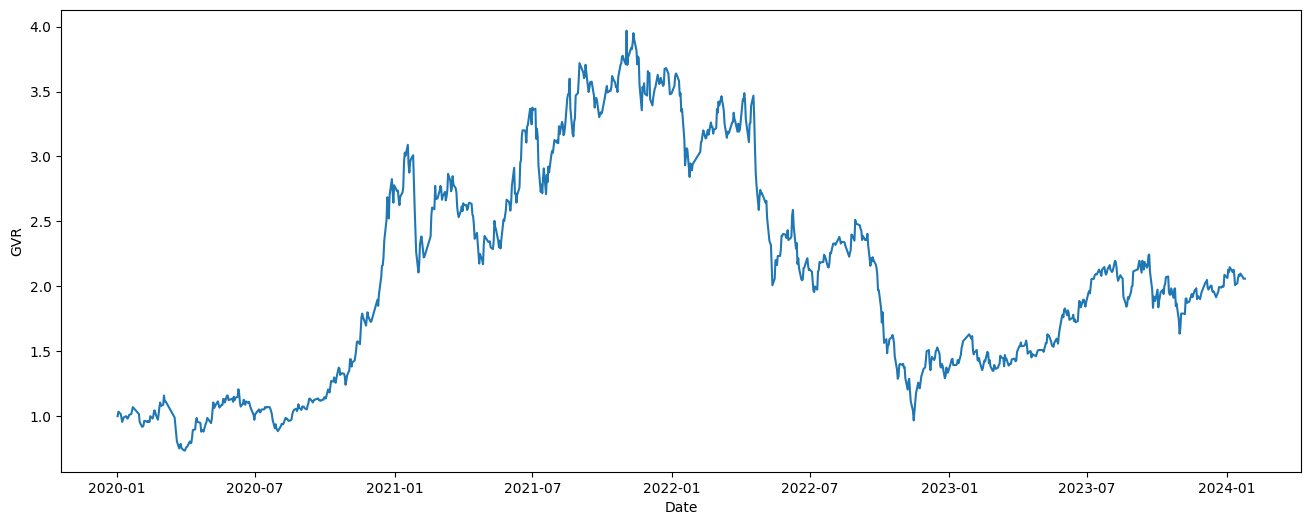

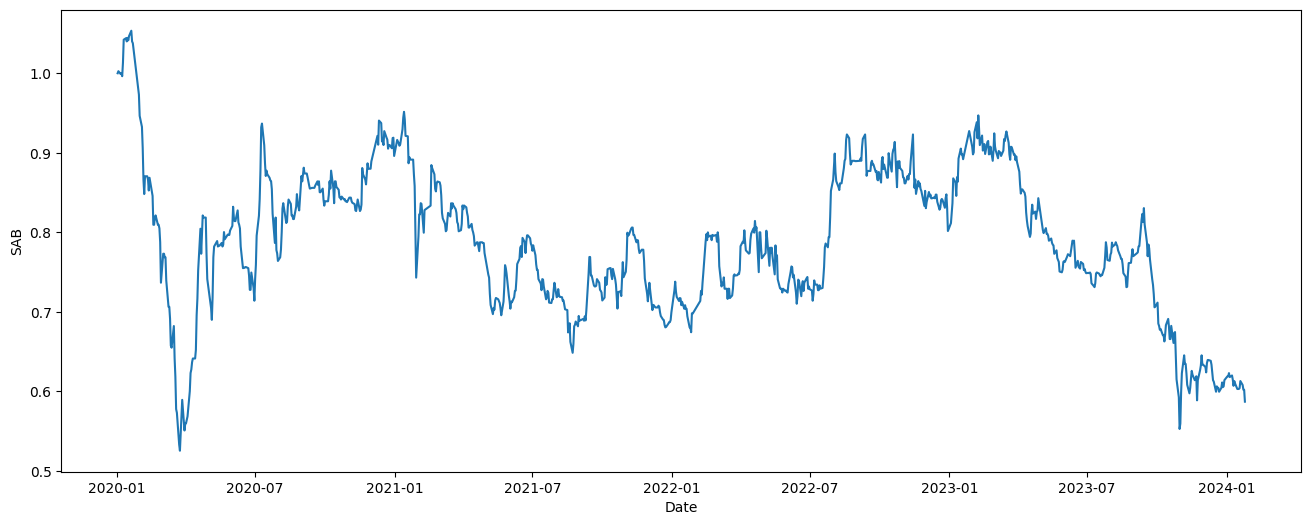

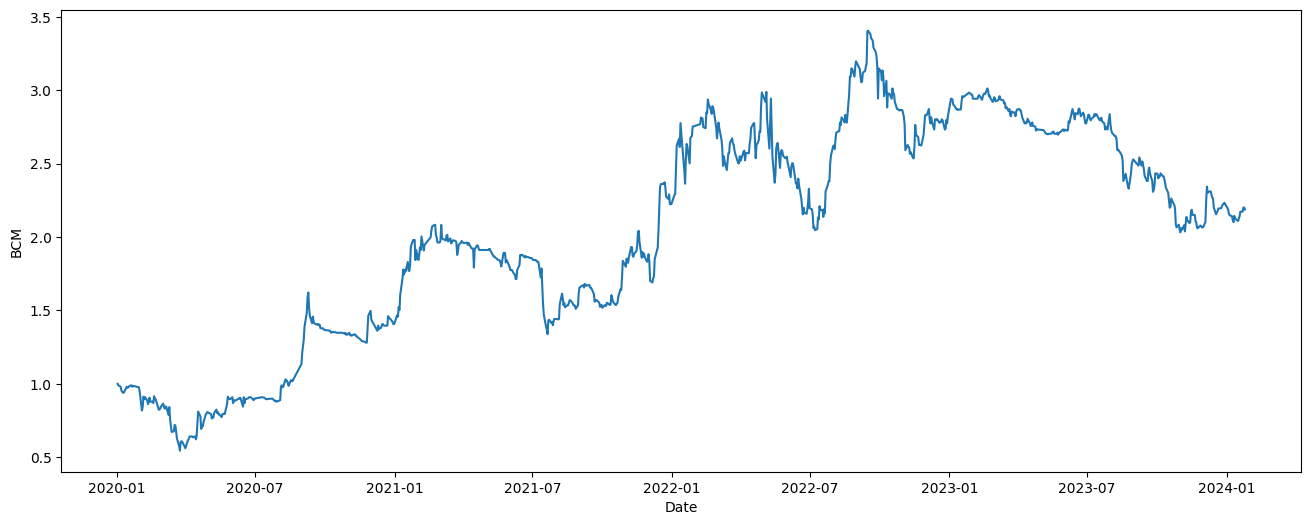

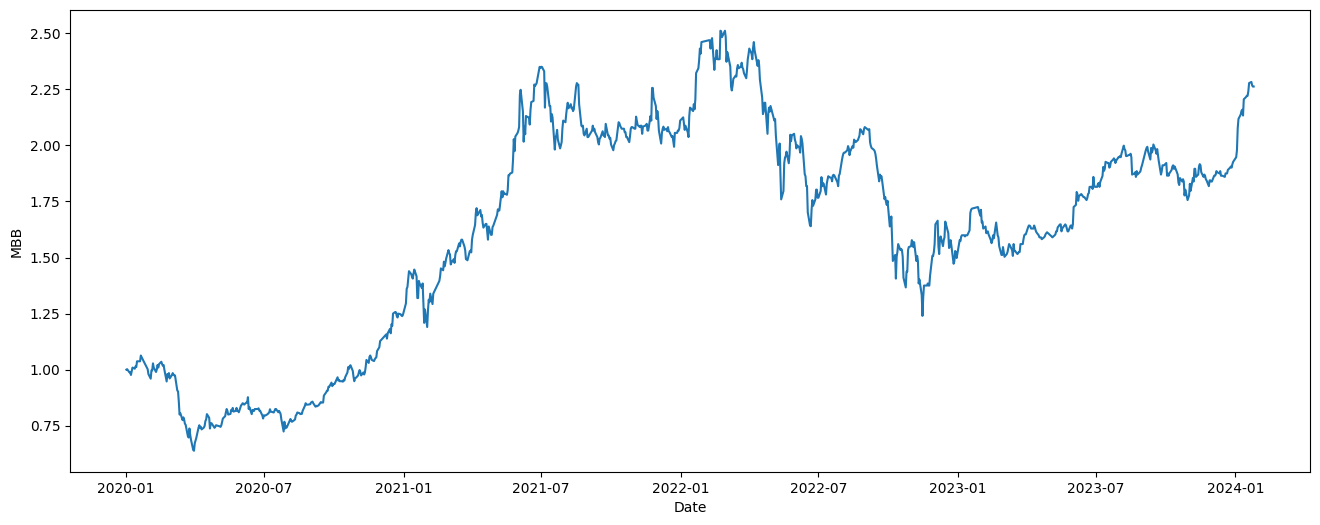

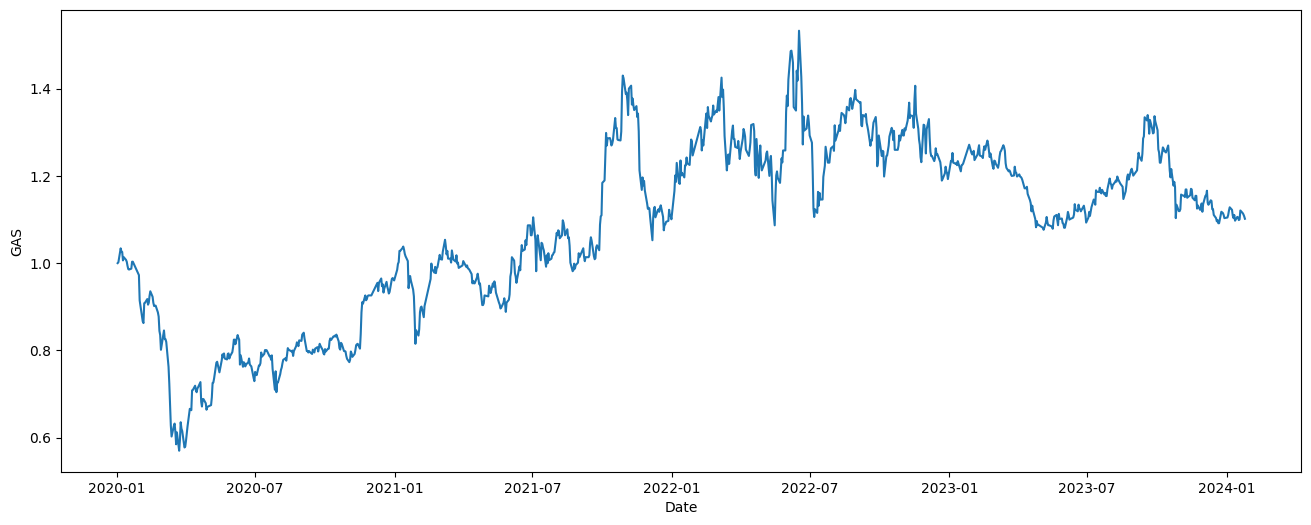

KeyError: 'y'

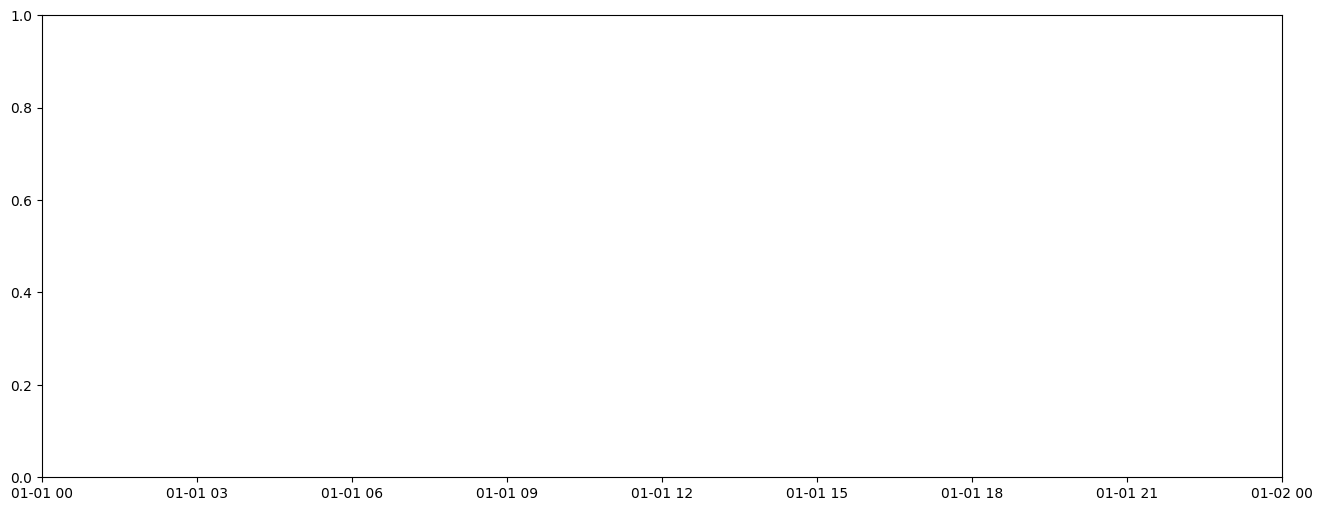

In [51]:
interactive_plot(normalize(df), 'Normalized Prices')